# Clients Churn Prediction

In [29]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

In [32]:
# Load data
url = "https://raw.githubusercontent.com/OlgaGnezdilova/Customer-Churn-Prediction/main/Customer-Churn.csv"
df = pd.read_csv(url)
downsampled.head(5)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,58,0,60.30,3563.80,1
1,54,0,24.75,1342.15,0
2,55,1,44.85,2479.05,0
3,49,0,49.65,2409.90,0
4,54,0,20.10,1079.45,0


## Spliting and Scaling Data

In [5]:
# X-y split
X = downsampled[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = downsampled['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

Logistic Regression Performance:


,Error_metric,Train,Test
0,Accuracy,0.734114,0.737968
1,Precision,0.728571,0.727749
2,Recall,0.748499,0.751351


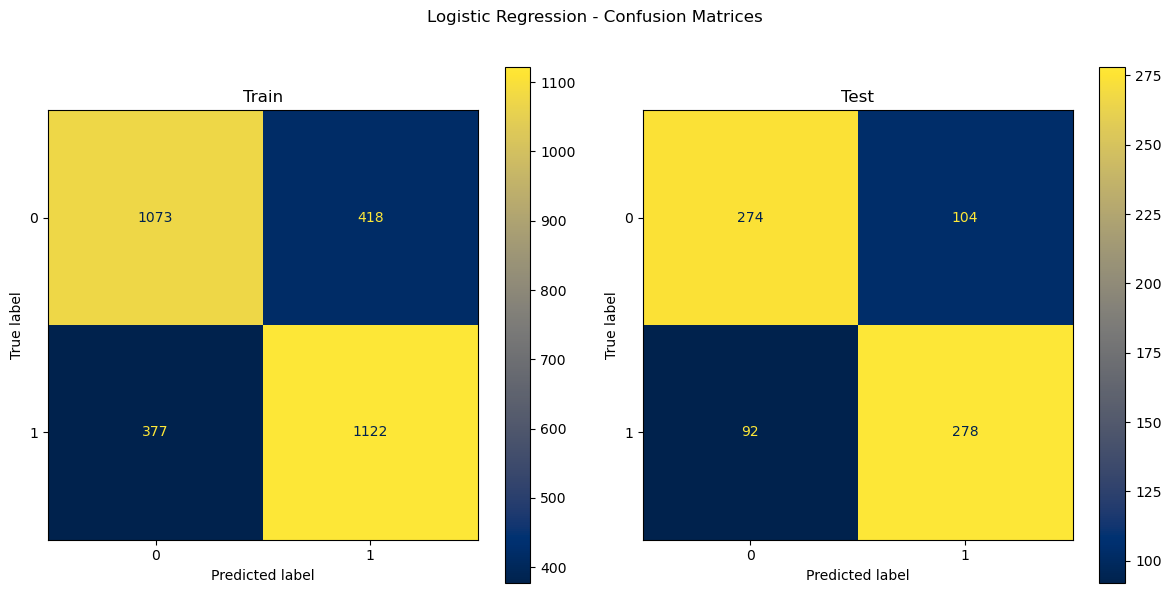

In [15]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

# Performance DataFrame for Logistic Regression
performance_log = pd.DataFrame({
    'Error_metric': ['Accuracy', 'Precision', 'Recall'],
    'Train': [accuracy_score(y_train, y_pred_train_log),
              precision_score(y_train, y_pred_train_log),
              recall_score(y_train, y_pred_train_log)],
    'Test': [accuracy_score(y_test, y_pred_test_log),
             precision_score(y_test, y_pred_test_log),
             recall_score(y_test, y_pred_test_log)]
})

print("Logistic Regression Performance:")
display(performance_log)

# Confusion Matrix Visualization for Logistic Regression
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Logistic Regression - Confusion Matrices')

cm_train_log = confusion_matrix(y_train, y_pred_train_log)
disp_train_log = ConfusionMatrixDisplay(confusion_matrix=cm_train_log)
disp_train_log.plot(ax=axes[0], cmap='cividis', values_format='d')
axes[0].set_title('Train')

cm_test_log = confusion_matrix(y_test, y_pred_test_log)
disp_test_log = ConfusionMatrixDisplay(confusion_matrix=cm_test_log)
disp_test_log.plot(ax=axes[1], cmap='cividis', values_format='d')
axes[1].set_title('Test')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## KNN Classifier

KNN Performance:


,Error_metric,Train,Test
0,Accuracy,0.791973,0.705882
1,Precision,0.785296,0.699468
2,Recall,0.805203,0.710811


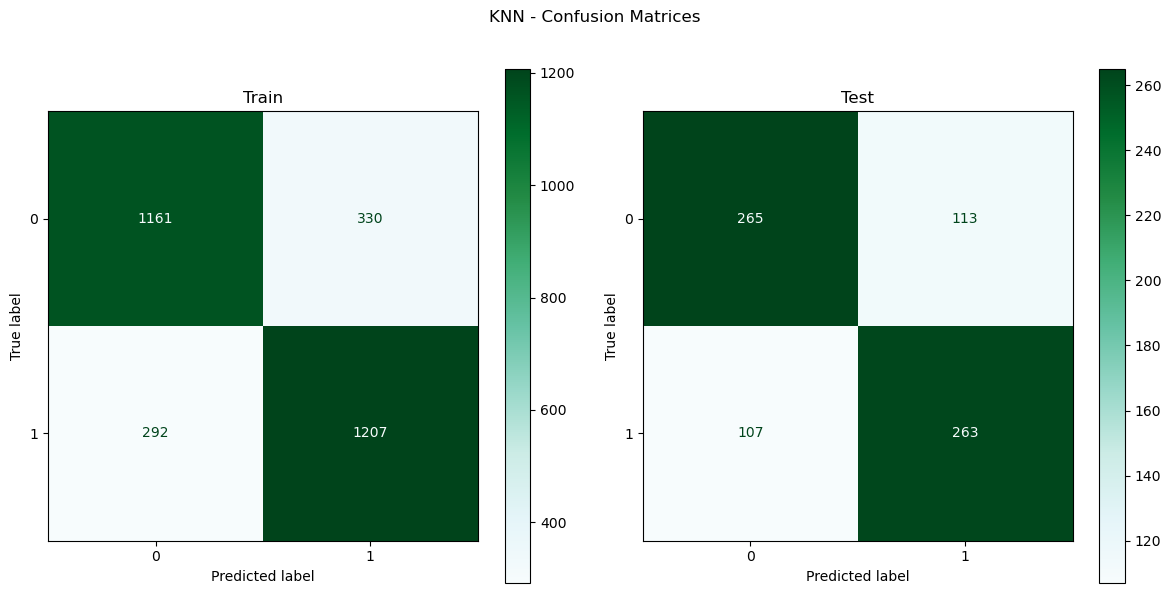

In [19]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings('ignore')

# Load data
downsampled = pd.read_csv("/Users/olga.gnezdilova/Documents/GitHub/Olya_DA/Week7_ML/downsampling.csv")

# X-y split
X = downsampled[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']]
y = downsampled['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model.fit(X_train_scaled, y_train)
y_pred_train_knn = knn_model.predict(X_train_scaled)
y_pred_test_knn = knn_model.predict(X_test_scaled)

# Performance DataFrame for KNN
performance_knn = pd.DataFrame({
    'Error_metric': ['Accuracy', 'Precision', 'Recall'],
    'Train': [accuracy_score(y_train, y_pred_train_knn),
              precision_score(y_train, y_pred_train_knn),
              recall_score(y_train, y_pred_train_knn)],
    'Test': [accuracy_score(y_test, y_pred_test_knn),
             precision_score(y_test, y_pred_test_knn),
             recall_score(y_test, y_pred_test_knn)]
})

print("KNN Performance:")
display(performance_knn)

# Confusion Matrix Visualization for KNN
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('KNN - Confusion Matrices')

cm_train_knn = confusion_matrix(y_train, y_pred_train_knn)
disp_train_knn = ConfusionMatrixDisplay(confusion_matrix=cm_train_knn)
disp_train_knn.plot(ax=axes[0], cmap='BuGn', values_format='d')
axes[0].set_title('Train')

cm_test_knn = confusion_matrix(y_test, y_pred_test_knn)
disp_test_knn = ConfusionMatrixDisplay(confusion_matrix=cm_test_knn)
disp_test_knn.plot(ax=axes[1], cmap='BuGn', values_format='d')
axes[1].set_title('Test')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Decision Tree Classifier

Decision Tree Performance:


,Error_metric,Train,Test
0,Accuracy,0.991304,0.653743
1,Precision,0.996628,0.639798
2,Recall,0.985991,0.686486


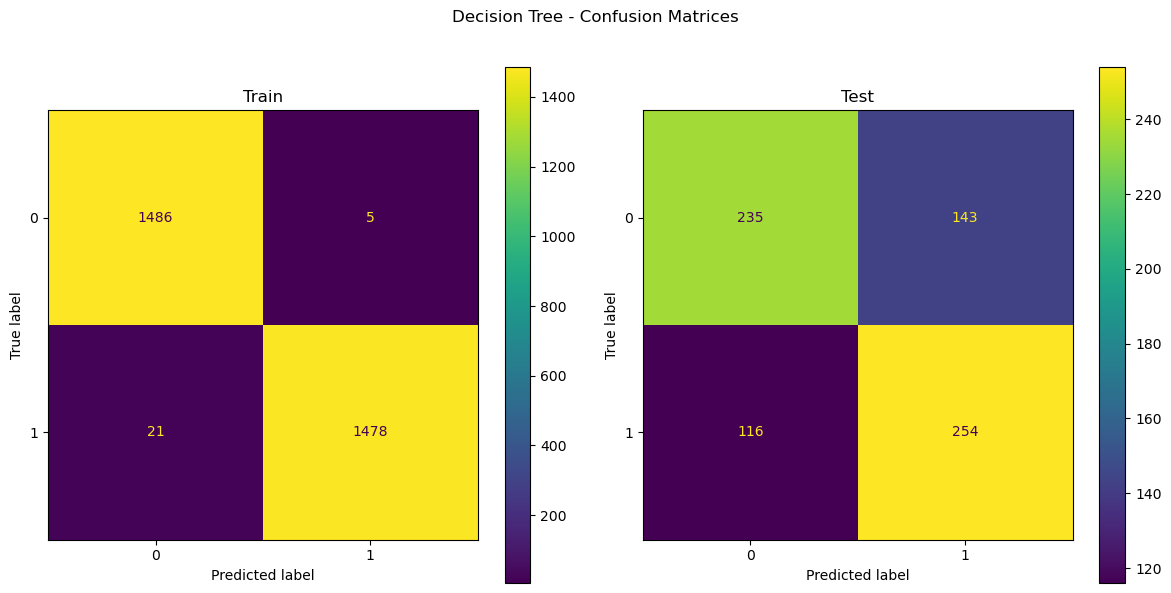

In [22]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_scaled, y_train)
y_pred_train_tree = tree_model.predict(X_train_scaled)
y_pred_test_tree = tree_model.predict(X_test_scaled)

# Performance DataFrame for Decision Tree
performance_tree = pd.DataFrame({
    'Error_metric': ['Accuracy', 'Precision', 'Recall'],
    'Train': [accuracy_score(y_train, y_pred_train_tree),
              precision_score(y_train, y_pred_train_tree),
              recall_score(y_train, y_pred_train_tree)],
    'Test': [accuracy_score(y_test, y_pred_test_tree),
             precision_score(y_test, y_pred_test_tree),
             recall_score(y_test, y_pred_test_tree)]
})

print("Decision Tree Performance:")
display(performance_tree)

# Confusion Matrix Visualization for Decision Tree
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Decision Tree - Confusion Matrices')

cm_train_tree = confusion_matrix(y_train, y_pred_train_tree)
disp_train_tree = ConfusionMatrixDisplay(confusion_matrix=cm_train_tree)
disp_train_tree.plot(ax=axes[0], cmap='viridis', values_format='d')
axes[0].set_title('Train')

cm_test_tree = confusion_matrix(y_test, y_pred_test_tree)
disp_test_tree = ConfusionMatrixDisplay(confusion_matrix=cm_test_tree)
disp_test_tree.plot(ax=axes[1], cmap='viridis', values_format='d')
axes[1].set_title('Test')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
